# Time series analysis sample (Bike Sharing Data)

- Bike Sharing Dataset Data Set https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score


# Dataset
DF_RAW = pd.read_csv(
    "day.csv",
    parse_dates=[1]
)

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Prepare dataset to use.
display(DF_RAW.head(3))
display(DF_RAW.tail(3))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [3]:
# Data preprocessing and splitting.
df = DF_RAW[
    ['dteday', 'registered']
]
df.columns = ['ds', 'y']

display(df.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [4]:
day_border = pd.to_datetime('2012-11-01')
index_train = df['ds'] < day_border
index_test = df['ds'] >= day_border

X_train = df[index_train]
X_test = df[index_test]
date_test = df['ds'][index_test]

In [5]:
# Using model Prophet.
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.fit(X_train)

08:12:27 - cmdstanpy - INFO - Chain [1] start processing
08:12:27 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Prediction.
future = model.make_future_dataframe(
    periods=61,
    freq='D'
)

display(future.head())
display(future.tail())

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [7]:
pred = model.predict(future)

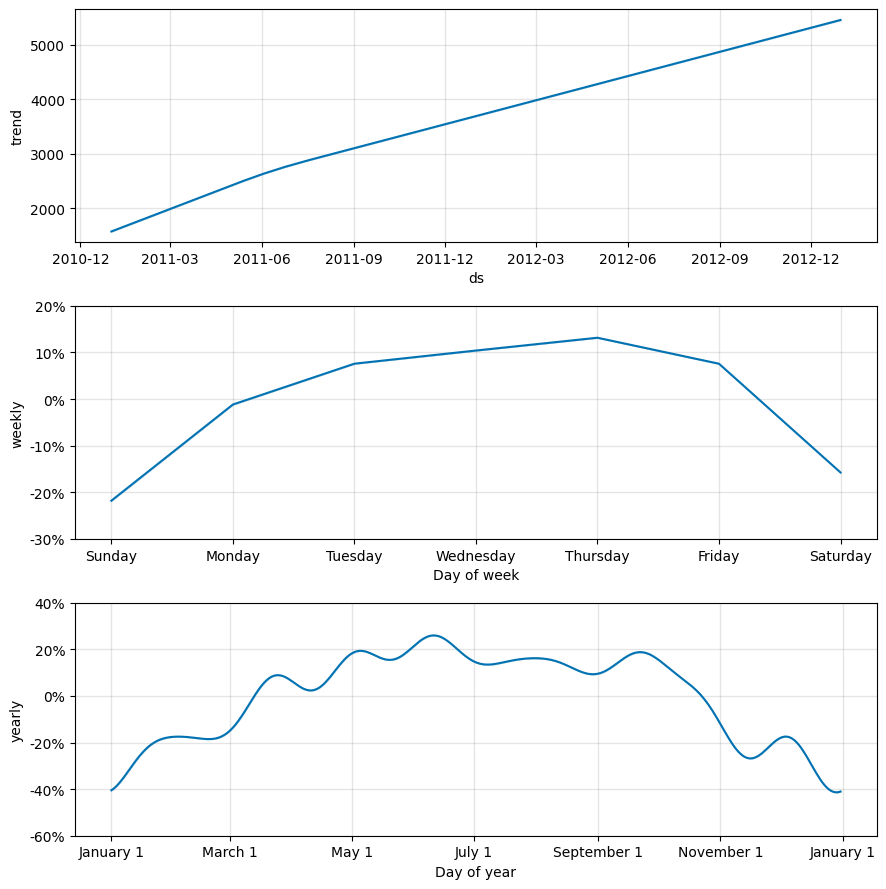

In [8]:
# Evaluation.
fig = model.plot_components(pred)
plt.show()

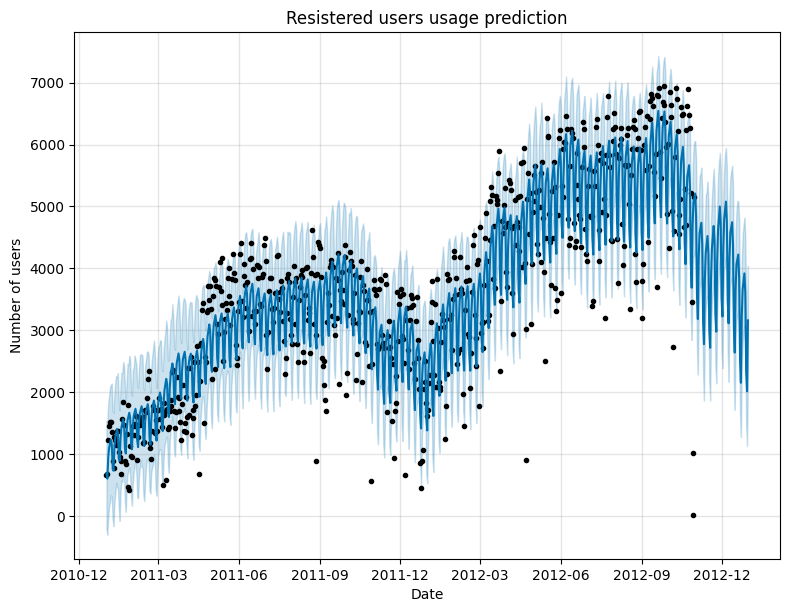

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

model.plot(pred, ax=ax)
ax.set_title('Resistered users usage prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Number of users')
plt.show()

In [10]:
# Calc R2.
NOVEMBER_AND_DECEMBER_DAYS: int = 30 + 31

y_pred = pred[-(NOVEMBER_AND_DECEMBER_DAYS):][
    ['yhat']
].values
y_test = X_test['y'].values

score = r2_score(y_test, y_pred)

print(f'R2 score: {score:.4f}')

R2 score: 0.3736


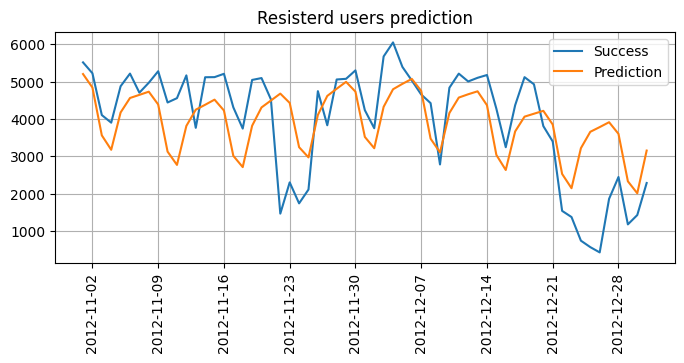

In [11]:
# Show resisterd users prediction.
weeks = mdates.WeekdayLocator(byweekday=mdates.FR)

fig, ax = plt.subplots(figsize=(8, 3))
ax.grid()
ax.plot(
    date_test,
    y_test,
    label='Success'
)
ax.plot(
    date_test,
    y_pred,
    label='Prediction'
)
ax.xaxis.set_major_locator(weeks)
ax.tick_params(
    axis='x',
    rotation=90
)
ax.set_title('Resisterd users prediction')
ax.legend()
plt.show()